# Modul 6 : Pendeteksian Tepi

In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

Text(0.5, 1.0, 'Original Image')

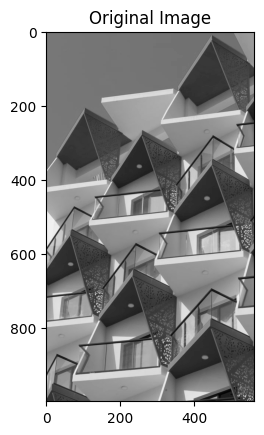

In [50]:
image = plt.imread("Modul6.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.title("Original Image")

## Function Padding secara Dinamis pada Citra

In [51]:
def getPadding (image, kernel):
    # mendapatkan titik tengah dari kernel
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    # menghitung lapisan dari padding yang nanti akan digunakan
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image,((atas,bawah),(kiri,kanan)), 'constant', constant_values=0)
    return result

In [52]:
# a = 11**2+(-7**2)
# print(11**2+49)
a=11**2+49
math.sqrt(a)

13.038404810405298

## Function Konvolusi Deteksi Tepi pada Citra

In [53]:
def edgeDetection(image, kernelX, kernelY):
    result = np.zeros(image.shape).astype(int)
    # mendapatkan padding zero secara dinamis dengan menggunakan titik tengah dari kernel
    imgPad = getPadding(image,kernelX)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = 0
            y = 0
            for k in range(kernelX.shape[0]):
                for l in range(kernelX.shape[1]):
                    x += imgPad[i+k][j+l] * kernelX[k, l]
                    y += imgPad[i+k][j+l] * kernelY[k, l]
            # x=abs(x)
            # y=abs(y)
            # result[i, j] = x+y
            x*=x
            y*=y
            result[i, j] = math.sqrt(x+y)
            if(result[i, j]>128):
                result[i, j] = 255
            elif (result[i, j]<=128):
                result[i,j] = 0
    return result

## Sobel

In [54]:
sobelX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])
sobelY = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
    ])

Text(0.5, 1.0, 'Sobel Methode')

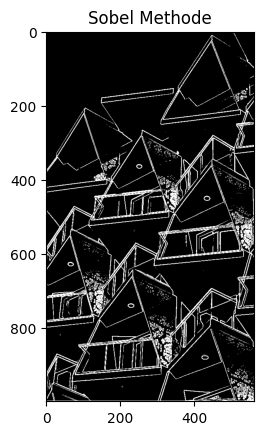

In [55]:
imgSobel = edgeDetection(image, sobelX, sobelY)
plt.imshow(imgSobel, cmap="gray")
plt.title("Sobel Methode")

## Prewitt

In [56]:
prewittX = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
    ])
prewittY = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ])

Text(0.5, 1.0, 'Prewitt Methode')

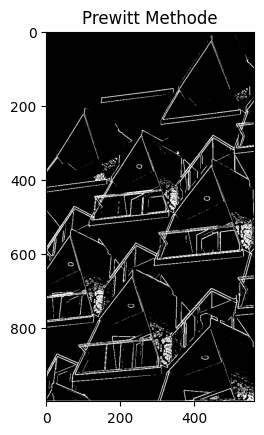

In [57]:
imgPrewitt = edgeDetection(image, prewittX, prewittY)
plt.imshow(imgPrewitt, cmap="gray")
plt.title("Prewitt Methode")

## Robert

In [58]:
robertX = np.array([
    [1,0],
    [0,-1]
    ])
robertY = np.array([
    [0,1],
    [-1,0]
    ])

Text(0.5, 1.0, 'Robert Methode')

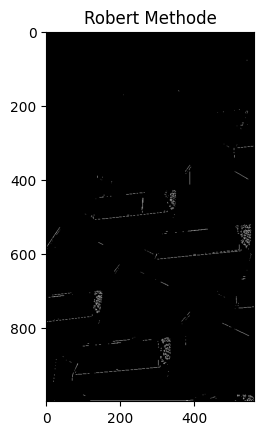

In [59]:
imgRobert = edgeDetection(image, robertX, robertY)
plt.imshow(imgRobert, cmap="gray")
plt.title("Robert Methode")

Text(0.5, 1.0, 'Robert')

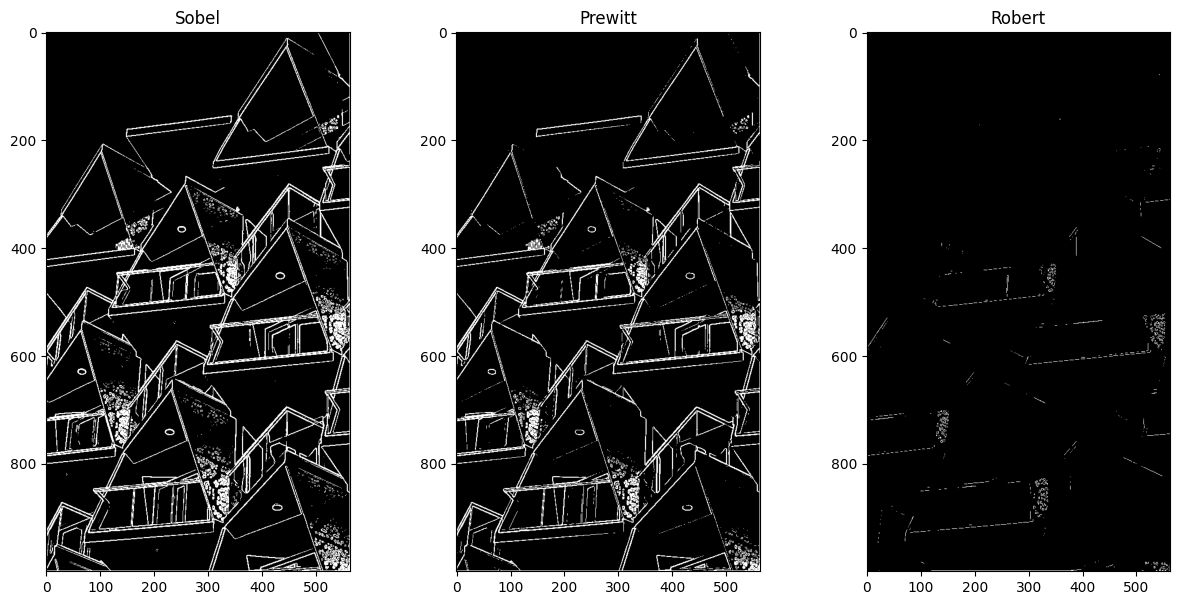

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(imgSobel, cmap="gray")
ax[0].set_title('Sobel')
ax[1].imshow(imgPrewitt, cmap="gray")
ax[1].set_title('Prewitt')
ax[2].imshow(imgRobert, cmap="gray")
ax[2].set_title('Robert')